# (Boostcourse) 프로젝트로 배우는 scikit-learn - Regression

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv('data/diabetes.csv')
print(df.shape)

(768, 9)


In [169]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Split

In [170]:
(df['Insulin'] > 0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [171]:
train = df[df['Insulin'] > 0].copy()
train.shape

(394, 9)

In [172]:
test = df[df['Insulin'] == 0].copy()
test.shape

(374, 9)

## EDA

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

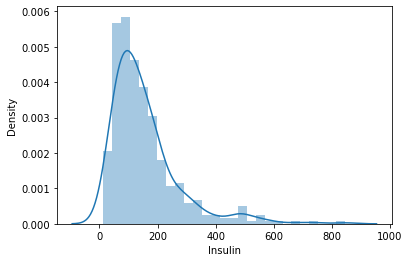

In [173]:
sns.distplot(train['Insulin'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Insulin'>

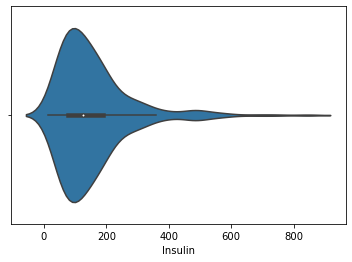

In [174]:
sns.violinplot(train['Insulin'])

In [175]:
desc = train['Insulin'].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [176]:
IQR = desc.loc["75%"] - desc.loc["25%"]
OUT = desc.loc["75%"] + (1.5 * IQR)
OUT

360.625

In [177]:
train[train['Insulin'] > OUT].shape

(24, 9)

In [178]:
train = train[train['Insulin'] < 600]
train.shape

(390, 9)

600이 아닌 out을 기준으로 한다면 오차는 더욱 줄어들게 된다.

### Feature names

In [179]:
feature_names = train.columns.tolist()
feature_names.remove('Insulin')
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [180]:
label_name = 'Insulin'
label_name

'Insulin'

In [181]:
X_train = train[feature_names]
X_train.shape

(390, 8)

In [182]:
y_train = train[label_name]
y_train.shape

(390,)

In [183]:
X_test = test[feature_names]
X_test.shape

(374, 8)

In [184]:
y_test = test[label_name]
y_test.shape

(374,)

### 머신러닝 알고리즘 가져오기

In [185]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [186]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, y_train, cv = 5, verbose=2, n_jobs = -1,)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished


array([ 25., 182.,  55.,  67., 135.])

<AxesSubplot:xlabel='Insulin'>

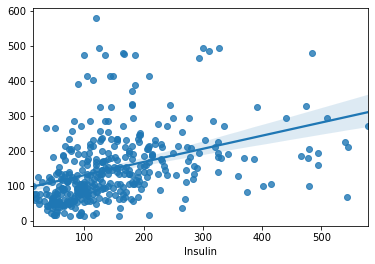

In [187]:
sns.regplot(x = y_train, y = y_predict)

기울기가 1에 가까울수록 좋은 예측이다

In [188]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train, y_predict)
r2

-0.1981991324875707

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


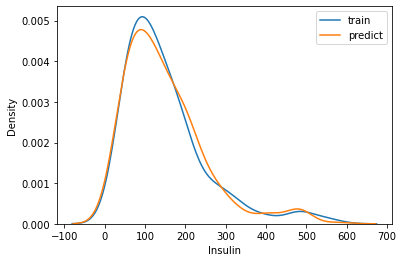

In [189]:
sns.distplot(y_train, hist = False, label = 'train')
sns.distplot(y_predict, hist = False, label = 'predict')
plt.legend()

### 오차 구하기

In [190]:
# MAE

error = abs(y_train - y_predict)
error.mean()

77.55128205128206

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

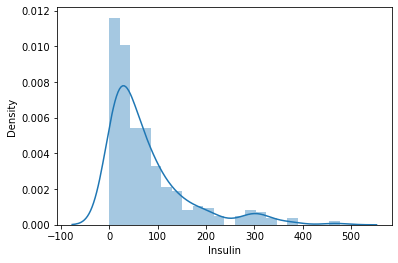

In [191]:
sns.distplot(error)

In [192]:
error.describe()

count    390.000000
mean      77.551282
std       83.770044
min        0.000000
25%       21.250000
50%       48.500000
75%      100.750000
max      476.000000
Name: Insulin, dtype: float64

In [193]:
# RMSE : Root Mean Squared Error

np.sqrt(((y_train - y_predict) ** 2).mean())

114.07729048819579

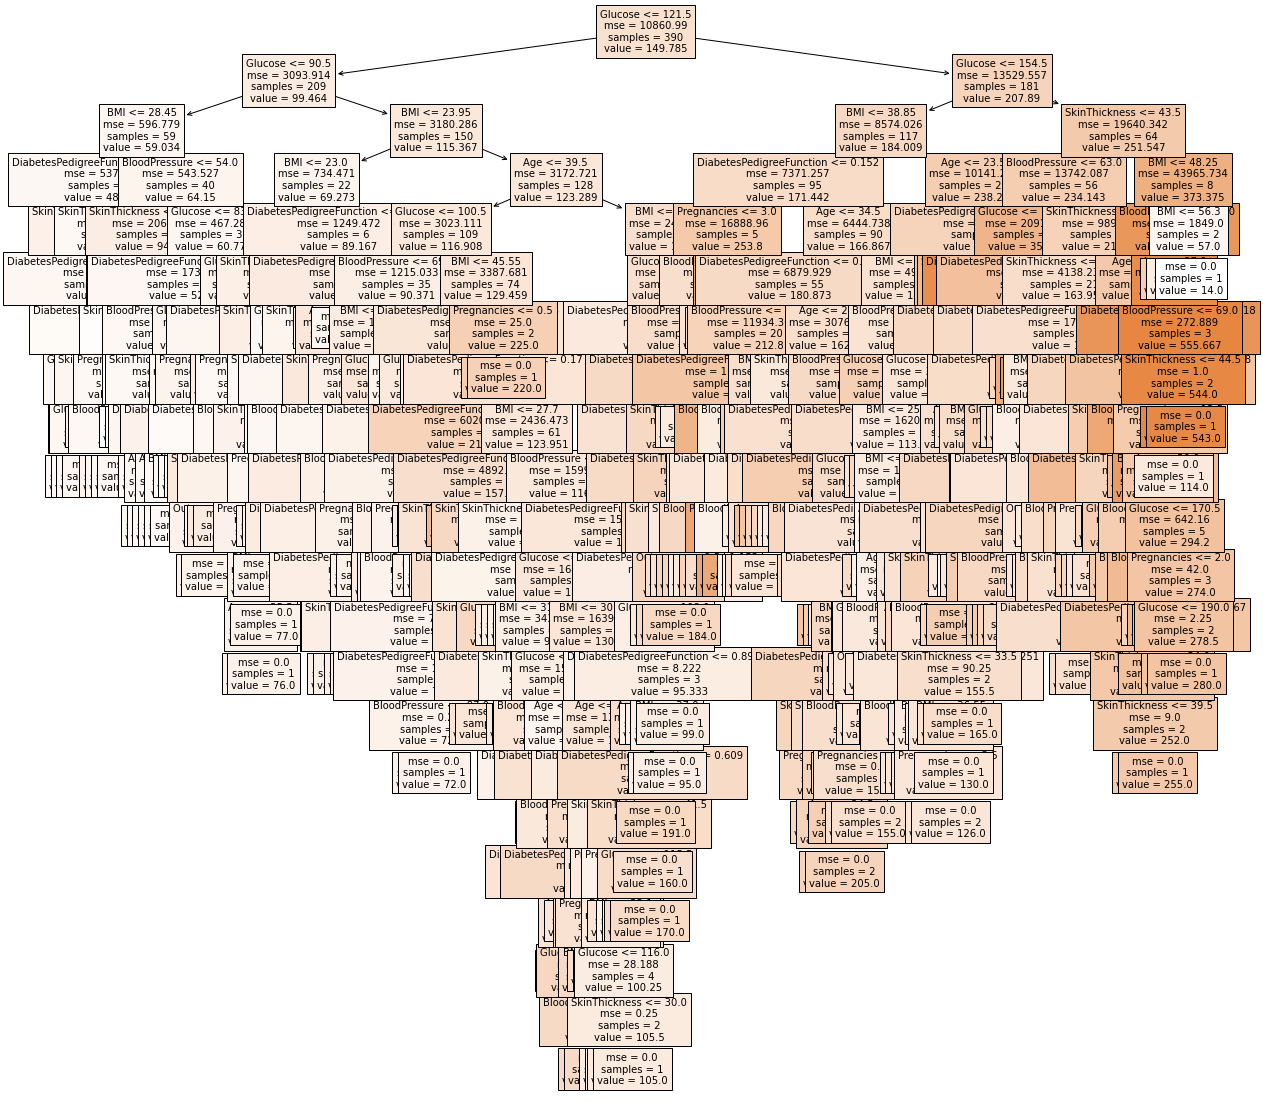

In [194]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20,20))
tree = plot_tree(model, 
                 feature_names= feature_names,
                 filled = True,
                 fontsize = 10)

<AxesSubplot:>

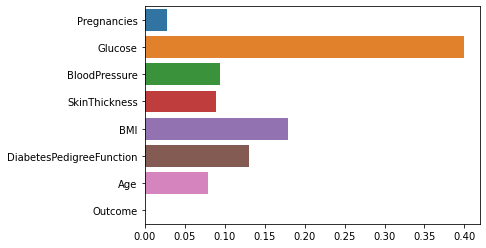

In [195]:
sns.barplot(x = model.feature_importances_, y = feature_names)

### 예측

In [196]:
y_test = model.predict(X_test)
y_test[:5]

array([126.,  37., 387.,  36., 182.])

In [197]:
train.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,262.0,125.847328,89.232442,15.0,66.00,100.0,159.5,545.0
1,128.0,198.781250,115.703323,14.0,126.75,168.0,232.5,579.0


In [198]:
test['Insulin'] = y_test

test.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,138.881356,102.562709,15.0,71.0,105.0,175.00,495.0
1,138.0,225.739130,118.178221,44.0,127.0,193.0,333.25,543.0


이전 시각화를 통해 max = 846이 정확히 846을 예측하지 않았다는 것도 확인했음.